#THEME: Intrusion_detection_dataset

#IMPORTATION DES BIBLIOTHEQUES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d
from sklearn.preprocessing import LabelEncoder

#CHARGEMENT DU DATASET

In [ ]:
dataset = pd.read_csv("IDS_Data1.csv")
test_data = pd.read_csv("gan_synthetic_data.csv")

#ANALYSE EXPLORATOIRE ET VISUALISATION DES DONNEES

In [ ]:
test_data

,Sport,TotPkts,TotBytes,SrcPkts,DstPkts,SrcBytes,service,flag,protocol_type,count,srv_count,dst_host_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_bytes,class
0,59270,17,317,9,7,791,14,9,0,144,83,43,0.009236,0.024598,29267,0
1,56553,17,1183,9,9,1390,49,4,0,74,22,207,0.962854,0.251151,220,1
2,58969,17,1358,9,7,747,13,5,0,8,18,253,0.813092,0.518936,23759,0
3,57051,19,1063,9,9,1024,35,1,0,102,59,223,0.368321,0.479947,3631,0
4,56929,19,1156,9,2,775,51,1,0,231,5,147,0.210741,0.145777,17046,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4532,55211,20,1276,10,10,644,62,5,1,258,10,255,0.040000,0.050000,0,0
4533,55093,20,1276,10,10,644,63,5,1,251,3,255,0.010000,0.080000,0,0
4534,55399,20,1276,10,10,644,62,5,1,197,2,255,0.010000,0.080000,0,0
4535,55194,20,1276,10,10,644,62,5,1,211,22,255,0.090000,0.050000,0,0


In [ ]:
test_data.columns

Index(['Sport', 'TotPkts', 'TotBytes', 'SrcPkts', 'DstPkts', 'SrcBytes',
       'service', 'flag', 'protocol_type', 'count', 'srv_count',
       'dst_host_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_bytes', 'class'],
      dtype='object')

In [ ]:
test_data.isna().sum()

,0
Sport,0
TotPkts,0
TotBytes,0
SrcPkts,0
DstPkts,0
SrcBytes,0
service,0
flag,0
protocol_type,0
count,0


In [ ]:
#verification des doublons
test_data.duplicated().sum()

0

In [ ]:
test_data = pd.get_dummies(test_data, columns=['protocol_type'])

In [ ]:
dataset

,Sport,TotPkts,TotBytes,SrcPkts,DstPkts,SrcBytes,service,flag,protocol_type,count,srv_count,dst_host_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_bytes,class
0,143,2,180,2,0,180,ftp_data,SF,tcp,2,2,150,0.17,0.03,0,normal
1,68,2,684,2,0,684,other,SF,udp,13,1,255,0.00,0.60,0,normal
2,0,1,60,1,0,60,private,S0,tcp,123,6,255,0.10,0.05,0,anomaly
3,54949,10,628,4,6,248,http,SF,tcp,5,5,30,1.00,0.00,8153,normal
4,54943,8,496,4,4,248,http,SF,tcp,30,32,255,1.00,0.00,420,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,63510,18,1152,10,8,644,exec,RSTO,tcp,100,7,255,0.03,0.06,0,anomaly
25188,63512,20,1276,10,10,644,ftp_data,SF,tcp,1,1,1,1.00,0.00,0,anomaly
25189,63513,20,1276,10,10,644,private,REJ,tcp,105,7,255,0.05,0.07,0,anomaly
25190,63511,20,1276,10,10,644,nnsp,S0,tcp,129,18,255,0.08,0.06,0,anomaly


In [ ]:
dataset.columns

Index(['Sport', 'TotPkts', 'TotBytes', 'SrcPkts', 'DstPkts', 'SrcBytes',
       'service', 'flag', 'protocol_type', 'count', 'srv_count',
       'dst_host_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_bytes', 'class'],
      dtype='object')

In [ ]:
test_data.columns

Index(['Sport', 'TotPkts', 'TotBytes', 'SrcPkts', 'DstPkts', 'SrcBytes',
       'service', 'flag', 'count', 'srv_count', 'dst_host_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_bytes',
       'class', 'protocol_type_0', 'protocol_type_1', 'protocol_type_2'],
      dtype='object')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sport                   25192 non-null  int64  
 1   TotPkts                 25192 non-null  int64  
 2   TotBytes                25192 non-null  int64  
 3   SrcPkts                 25192 non-null  int64  
 4   DstPkts                 25192 non-null  int64  
 5   SrcBytes                25192 non-null  int64  
 6   service                 25192 non-null  object 
 7   flag                    25192 non-null  object 
 8   protocol_type           25192 non-null  object 
 9   count                   25192 non-null  int64  
 10  srv_count               25192 non-null  int64  
 11  dst_host_count          25192 non-null  int64  
 12  dst_host_same_srv_rate  25192 non-null  float64
 13  dst_host_diff_srv_rate  25192 non-null  float64
 14  dst_bytes               25192 non-null

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4537 entries, 0 to 4536
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sport                   4537 non-null   int64  
 1   TotPkts                 4537 non-null   int64  
 2   TotBytes                4537 non-null   int64  
 3   SrcPkts                 4537 non-null   int64  
 4   DstPkts                 4537 non-null   int64  
 5   SrcBytes                4537 non-null   int64  
 6   service                 4537 non-null   int64  
 7   flag                    4537 non-null   int64  
 8   count                   4537 non-null   int64  
 9   srv_count               4537 non-null   int64  
 10  dst_host_count          4537 non-null   int64  
 11  dst_host_same_srv_rate  4537 non-null   float64
 12  dst_host_diff_srv_rate  4537 non-null   float64
 13  dst_bytes               4537 non-null   int64  
 14  class                   4537 non-null   

In [ ]:
dataset['class'].value_counts()

,count
class,
normal,13449
anomaly,11743


In [ ]:
test_data['class'].value_counts()

,count
class,
0,2330
1,2207


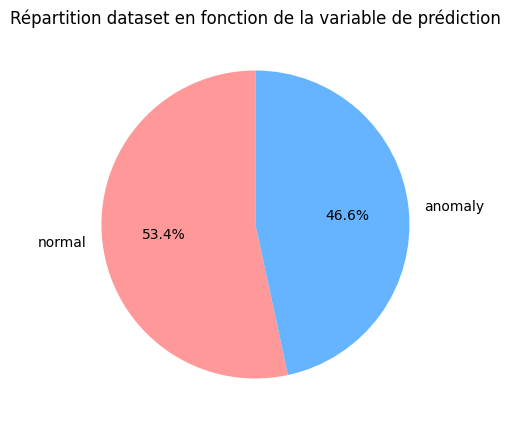

In [ ]:
plt.figure(figsize=(5, 5))
dataset["class"].value_counts().plot.pie(
    autopct='%1.1f%%',  # Affiche le pourcentage avec une décimale
    startangle=90,      # Démarre le camembert à 90 degrés
    colors=['#ff9999','#66b3ff']  # Ajoutez des couleurs personnalisées si désiré
)
plt.title('Répartition dataset en fonction de la variable de prédiction')
plt.ylabel('')  # Masquer l'étiquette de l'axe y
plt.show()

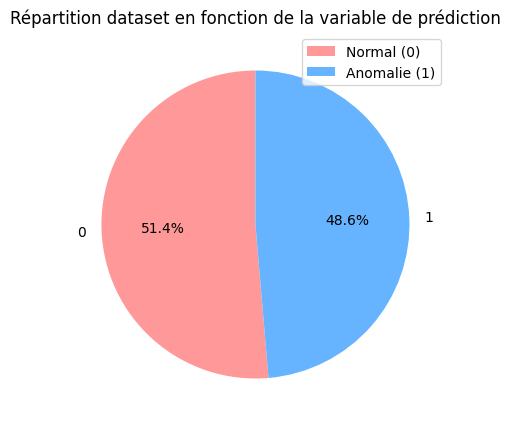

In [ ]:
plt.figure(figsize=(5, 5))
test_data["class"].value_counts().plot.pie(
    autopct='%1.1f%%',  # Affiche le pourcentage avec une décimale
    startangle=90,      # Démarre le camembert à 90 degrés
    colors=['#ff9999','#66b3ff']  # Ajoutez des couleurs personnalisées si désiré
)
plt.title('Répartition dataset en fonction de la variable de prédiction')
plt.ylabel('')  # Masquer l'étiquette de l'axe y
plt.legend(['Normal (0)', 'Anomalie (1)'], loc='upper right')
plt.show()

In [ ]:
dataset['protocol_type'].value_counts()

,count
protocol_type,
tcp,20526
udp,3011
icmp,1655


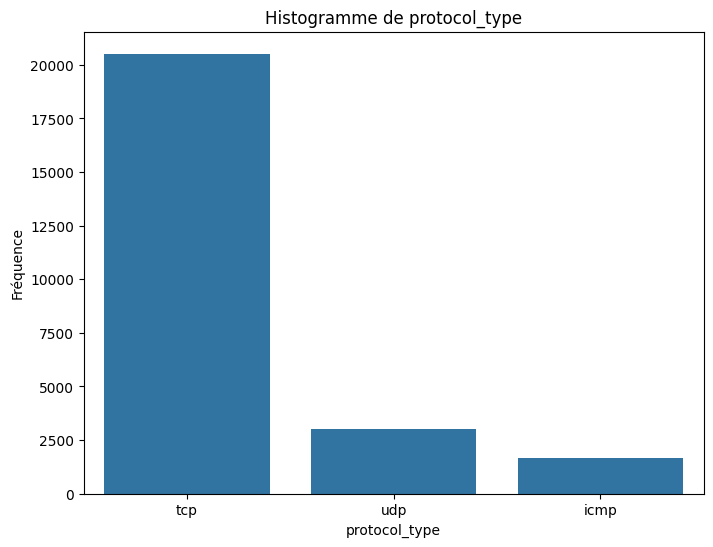

In [ ]:
# Sélectionner la variable catégorielle à visualiser, ici 'protocol_type'
variable_categorielle = 'protocol_type'

# Créer l'histogramme
plt.figure(figsize=(8, 6))
sns.countplot(x=dataset['protocol_type'], data=dataset)

# Ajouter les titres et labels
plt.title(f"Histogramme de {variable_categorielle}")
plt.xlabel(variable_categorielle)
plt.ylabel("Fréquence")

# Afficher l'histogramme
plt.show()

In [ ]:
dataset['service'].value_counts()

,count
service,
http,8003
private,4351
domain_u,1820
smtp,1449
ftp_data,1396
...,...
urh_i,4
red_i,3
pm_dump,3


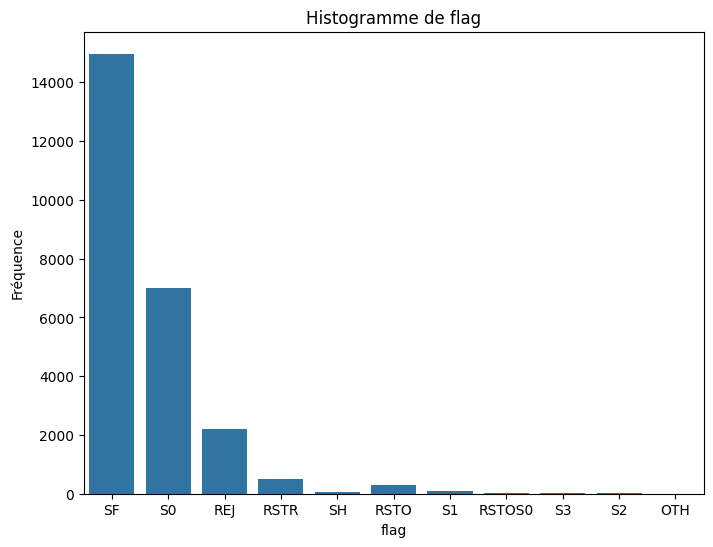

In [ ]:
# Sélectionner la variable catégorielle à visualiser, ici 'protocol_type'
variable_categorielle = 'flag'

# Créer l'histogramme
plt.figure(figsize=(8, 6))
sns.countplot(x=dataset['flag'], data=dataset)

# Ajouter les titres et labels
plt.title(f"Histogramme de {variable_categorielle}")
plt.xlabel(variable_categorielle)
plt.ylabel("Fréquence")

# Afficher l'histogramme
plt.show()

In [ ]:
dataset['flag'].value_counts()

,count
flag,
SF,14973
S0,7009
REJ,2216
RSTR,497
RSTO,304
S1,88
SH,43
RSTOS0,21
S2,21


#PRETRAITEMENT DES DONNEES

##NETTOYAGE DES DONNEES

###Valeurs manquantes

In [ ]:
#verification des valeurs manquantes: apres observation nous remarquons que nous n avons pas la presence des valeurs nulles dans nos champs
dataset.isnull().sum()


,0
Sport,0
TotPkts,0
TotBytes,0
SrcPkts,0
DstPkts,0
SrcBytes,0
service,0
flag,0
protocol_type,0
count,0


In [ ]:
#verification des valeurs manquantes
dataset.isna().sum().sum()

0

In [ ]:
test_data.isnull().sum().sum()

0

In [ ]:
test_data.isna().sum()

,0
Sport,0
TotPkts,0
TotBytes,0
SrcPkts,0
DstPkts,0
SrcBytes,0
service,0
flag,0
count,0
srv_count,0


In [ ]:
dataset.shape

(25192, 16)

###Les doublons

In [ ]:
#verification des doublons
dataset.duplicated().sum()

0

In [ ]:
test_data.duplicated().sum()

0

##ENCODAGE DES DONNEES

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sport                   25192 non-null  int64  
 1   TotPkts                 25192 non-null  int64  
 2   TotBytes                25192 non-null  int64  
 3   SrcPkts                 25192 non-null  int64  
 4   DstPkts                 25192 non-null  int64  
 5   SrcBytes                25192 non-null  int64  
 6   service                 25192 non-null  object 
 7   flag                    25192 non-null  object 
 8   protocol_type           25192 non-null  object 
 9   count                   25192 non-null  int64  
 10  srv_count               25192 non-null  int64  
 11  dst_host_count          25192 non-null  int64  
 12  dst_host_same_srv_rate  25192 non-null  float64
 13  dst_host_diff_srv_rate  25192 non-null  float64
 14  dst_bytes               25192 non-null

In [ ]:
dataset = pd.get_dummies(dataset, columns=['protocol_type'])

In [ ]:
dataset.shape

(25192, 18)

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4537 entries, 0 to 4536
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sport                   4537 non-null   int64  
 1   TotPkts                 4537 non-null   int64  
 2   TotBytes                4537 non-null   int64  
 3   SrcPkts                 4537 non-null   int64  
 4   DstPkts                 4537 non-null   int64  
 5   SrcBytes                4537 non-null   int64  
 6   service                 4537 non-null   int64  
 7   flag                    4537 non-null   int64  
 8   count                   4537 non-null   int64  
 9   srv_count               4537 non-null   int64  
 10  dst_host_count          4537 non-null   int64  
 11  dst_host_same_srv_rate  4537 non-null   float64
 12  dst_host_diff_srv_rate  4537 non-null   float64
 13  dst_bytes               4537 non-null   int64  
 14  class                   4537 non-null   

In [ ]:
test_data.shape

(4537, 18)

In [ ]:
le = LabelEncoder()

# Application de l'encodage sur la colonne
dataset['service'] = le.fit_transform(dataset['service']) + 1  # +1 pour commencer à 1
test_data['service'] = le.fit_transform(test_data['service']) + 1  # +1 pour commencer à 1


In [ ]:
le = LabelEncoder()

# Application de l'encodage sur la colonne
dataset['flag'] = le.fit_transform(dataset['flag']) + 1  # +1 pour commencer à 1
test_data['flag'] = le.fit_transform(test_data['flag']) + 1  # +1 pour commencer à 1

In [ ]:
le = LabelEncoder()

# Application de l'encodage sur la colonne
dataset['class'] = le.fit_transform(dataset['class']) + 1  # +1 pour commencer à 1
test_data['class'] = le.fit_transform(test_data['class']) + 1  # +1 pour commencer à 1

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sport                   25192 non-null  int64  
 1   TotPkts                 25192 non-null  int64  
 2   TotBytes                25192 non-null  int64  
 3   SrcPkts                 25192 non-null  int64  
 4   DstPkts                 25192 non-null  int64  
 5   SrcBytes                25192 non-null  int64  
 6   service                 25192 non-null  int64  
 7   flag                    25192 non-null  int64  
 8   count                   25192 non-null  int64  
 9   srv_count               25192 non-null  int64  
 10  dst_host_count          25192 non-null  int64  
 11  dst_host_same_srv_rate  25192 non-null  float64
 12  dst_host_diff_srv_rate  25192 non-null  float64
 13  dst_bytes               25192 non-null  int64  
 14  class                   25192 non-null

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4537 entries, 0 to 4536
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sport                   4537 non-null   int64  
 1   TotPkts                 4537 non-null   int64  
 2   TotBytes                4537 non-null   int64  
 3   SrcPkts                 4537 non-null   int64  
 4   DstPkts                 4537 non-null   int64  
 5   SrcBytes                4537 non-null   int64  
 6   service                 4537 non-null   int64  
 7   flag                    4537 non-null   int64  
 8   count                   4537 non-null   int64  
 9   srv_count               4537 non-null   int64  
 10  dst_host_count          4537 non-null   int64  
 11  dst_host_same_srv_rate  4537 non-null   float64
 12  dst_host_diff_srv_rate  4537 non-null   float64
 13  dst_bytes               4537 non-null   int64  
 14  class                   4537 non-null   

##REDUCTION DES DONNEES

In [ ]:
corr = dataset.corr()
corr
corr.style.background_gradient(cmap='coolwarm')

,Sport,TotPkts,TotBytes,SrcPkts,DstPkts,SrcBytes,service,flag,count,srv_count,dst_host_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_bytes,class,protocol_type_icmp,protocol_type_tcp,protocol_type_udp
Sport,1.000000,-0.343233,-0.385105,-0.363896,-0.312434,-0.392206,-0.001541,-0.006625,0.005651,-0.001821,0.000747,-0.007803,0.003799,0.007426,-0.010736,0.011041,-0.011073,0.004827
TotPkts,-0.343233,1.000000,0.996783,0.997410,0.995251,0.995443,-0.007713,0.010902,-0.004862,0.004316,-0.004206,0.012145,-0.008901,-0.000748,0.011042,-0.003408,-0.001626,0.004550
TotBytes,-0.385105,0.996783,1.000000,0.998089,0.986787,0.999835,-0.007642,0.011553,-0.005456,0.003943,-0.004970,0.012716,-0.009215,-0.000940,0.011813,-0.003376,-0.001477,0.004347
SrcPkts,-0.363896,0.997410,0.998089,1.000000,0.985673,0.998023,-0.008252,0.011981,-0.005048,0.004283,-0.005027,0.012876,-0.009506,-0.000919,0.012145,-0.003000,-0.001797,0.004443
DstPkts,-0.312434,0.995251,0.986787,0.985673,1.000000,0.983735,-0.006921,0.009351,-0.004568,0.004326,-0.003060,0.011056,-0.008008,-0.000512,0.009458,-0.003933,-0.001382,0.004658
SrcBytes,-0.392206,0.995443,0.999835,0.998023,0.983735,1.000000,-0.007735,0.011780,-0.005511,0.003917,-0.005170,0.012878,-0.009342,-0.000984,0.012062,-0.003322,-0.001484,0.004314
service,-0.001541,-0.007713,-0.007642,-0.008252,-0.006921,-0.007735,1.000000,-0.295491,0.087957,-0.258859,0.184684,-0.450546,0.280962,-0.013782,-0.270494,-0.201882,0.229668,-0.120850
flag,-0.006625,0.010902,0.011553,0.011981,0.009351,0.011780,-0.295491,1.000000,-0.473533,0.196996,-0.319355,0.634415,-0.284016,0.027606,0.651309,0.199678,-0.359027,0.277442
count,0.005651,-0.004862,-0.005456,-0.005048,-0.004568,-0.005511,0.087957,-0.473533,1.000000,0.469728,0.466144,-0.477335,0.162274,-0.027824,-0.578790,0.089367,-0.044870,-0.014519
srv_count,-0.001821,0.004316,0.003943,0.004283,0.004326,0.003917,-0.258859,0.196996,0.469728,1.000000,0.146949,0.177955,-0.106196,-0.012524,-0.002370,0.385410,-0.526799,0.336505


In [ ]:
dataset = dataset.drop(columns=['TotPkts', 'SrcPkts', 'TotBytes'])
test_data = test_data.drop(columns=['TotPkts', 'SrcPkts', 'TotBytes'])

In [ ]:
# corr= dataset.corr()
# corr_y = abs(corr['class'])
# lowest_corr = corr_y[corr_y < 0.01]
# lowest_corr.sort_values(ascending=True)


In [ ]:

# dataset.drop(lowest_corr.index.values, axis = 1, inplace = True)

In [ ]:
corr = dataset.corr()
corr
corr.style.background_gradient(cmap='coolwarm')

,Sport,DstPkts,SrcBytes,service,flag,count,srv_count,dst_host_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_bytes,class,protocol_type_icmp,protocol_type_tcp,protocol_type_udp
Sport,1.000000,-0.312434,-0.392206,-0.001541,-0.006625,0.005651,-0.001821,0.000747,-0.007803,0.003799,0.007426,-0.010736,0.011041,-0.011073,0.004827
DstPkts,-0.312434,1.000000,0.983735,-0.006921,0.009351,-0.004568,0.004326,-0.003060,0.011056,-0.008008,-0.000512,0.009458,-0.003933,-0.001382,0.004658
SrcBytes,-0.392206,0.983735,1.000000,-0.007735,0.011780,-0.005511,0.003917,-0.005170,0.012878,-0.009342,-0.000984,0.012062,-0.003322,-0.001484,0.004314
service,-0.001541,-0.006921,-0.007735,1.000000,-0.295491,0.087957,-0.258859,0.184684,-0.450546,0.280962,-0.013782,-0.270494,-0.201882,0.229668,-0.120850
flag,-0.006625,0.009351,0.011780,-0.295491,1.000000,-0.473533,0.196996,-0.319355,0.634415,-0.284016,0.027606,0.651309,0.199678,-0.359027,0.277442
count,0.005651,-0.004568,-0.005511,0.087957,-0.473533,1.000000,0.469728,0.466144,-0.477335,0.162274,-0.027824,-0.578790,0.089367,-0.044870,-0.014519
srv_count,-0.001821,0.004326,0.003917,-0.258859,0.196996,0.469728,1.000000,0.146949,0.177955,-0.106196,-0.012524,-0.002370,0.385410,-0.526799,0.336505
dst_host_count,0.000747,-0.003060,-0.005170,0.184684,-0.319355,0.466144,0.146949,1.000000,-0.518816,0.143403,-0.030930,-0.368828,-0.197864,-0.009571,0.162572
dst_host_same_srv_rate,-0.007803,0.011056,0.012878,-0.450546,0.634415,-0.477335,0.177955,-0.518816,1.000000,-0.417101,0.022392,0.692212,0.154106,-0.201835,0.124006
dst_host_diff_srv_rate,0.003799,-0.008008,-0.009342,0.280962,-0.284016,0.162274,-0.106196,0.143403,-0.417101,1.000000,-0.012971,-0.238170,-0.088113,-0.032270,0.105936


##NORMALISATION DES DONNEES

In [ ]:
from sklearn.preprocessing import MinMaxScaler


# Initialiser le scaler Min-Max
scaler = MinMaxScaler()

# Appliquer la normalisation sur toutes les colonnes numériques du DataFrame
numeric_columns = dataset.columns
dataset = pd.DataFrame(scaler.fit_transform(dataset[numeric_columns]), columns=[col for col in numeric_columns])

numeric_columns = test_data.columns
test_data = pd.DataFrame(scaler.fit_transform(test_data[numeric_columns]), columns=[col for col in numeric_columns])


dataset.head()


,Sport,DstPkts,SrcBytes,service,flag,count,srv_count,dst_host_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_bytes,class,protocol_type_icmp,protocol_type_tcp,protocol_type_udp
0,0.002182,0.000000,0.001818,0.292308,0.9,0.001961,0.001961,0.588235,0.17,0.03,0.000000,1.0,0.0,1.0,0.0
1,0.001038,0.000000,0.009452,0.630769,0.9,0.023529,0.000000,1.000000,0.00,0.60,0.000000,1.0,0.0,0.0,1.0
2,0.000000,0.000000,0.000000,0.707692,0.5,0.239216,0.009804,1.000000,0.10,0.05,0.000000,0.0,0.0,1.0,0.0
3,0.838481,0.040000,0.002848,0.338462,0.9,0.007843,0.007843,0.117647,1.00,0.00,0.001583,1.0,0.0,1.0,0.0
4,0.838389,0.026667,0.002848,0.338462,0.9,0.056863,0.060784,1.000000,1.00,0.00,0.000082,1.0,0.0,1.0,0.0


#SEPARATION DES DONNEES TRAIN / TEST

In [ ]:
# Load libraries
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [ ]:
dataset.shape

(25192, 15)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sport                   25192 non-null  float64
 1   DstPkts                 25192 non-null  float64
 2   SrcBytes                25192 non-null  float64
 3   service                 25192 non-null  float64
 4   flag                    25192 non-null  float64
 5   count                   25192 non-null  float64
 6   srv_count               25192 non-null  float64
 7   dst_host_count          25192 non-null  float64
 8   dst_host_same_srv_rate  25192 non-null  float64
 9   dst_host_diff_srv_rate  25192 non-null  float64
 10  dst_bytes               25192 non-null  float64
 11  class                   25192 non-null  float64
 12  protocol_type_icmp      25192 non-null  float64
 13  protocol_type_tcp       25192 non-null  float64
 14  protocol_type_udp       25192 non-null

In [ ]:
# input attribute and target attribute
X = dataset.iloc[:, dataset.columns != dataset.columns[12]]  # Sélectionne toutes les colonnes sauf la 12e
y = dataset.iloc[:, 12]  # Sélectionne uniquement la 12e colonne

test_X = dataset.iloc[:, dataset.columns != dataset.columns[12]]  # Sélectionne toutes les colonnes sauf la 12e
test_y = dataset.iloc[:, 12]  # Sélectionne uniquement la 12e colonne

In [ ]:
X.shape

(25192, 14)

In [ ]:
y

,protocol_type_icmp
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
25187,0.0
25188,0.0
25189,0.0
25190,0.0


In [ ]:
# train test split with test size as 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

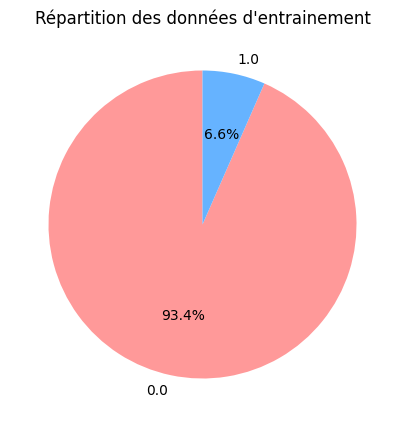

In [ ]:
plt.figure(figsize=(5, 5))
y_train.value_counts().plot.pie(
    autopct='%1.1f%%',  # Affiche le pourcentage avec une décimale
    startangle=90,      # Démarre le camembert à 90 degrés
    colors=['#ff9999','#66b3ff']  # Ajoutez des couleurs personnalisées si désiré
)
plt.title('Répartition des données d\'entrainement')
plt.ylabel('')  # Masquer l'étiquette de l'axe y
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)
X_train, y_train = smote.fit_resample(X_train, y_train)

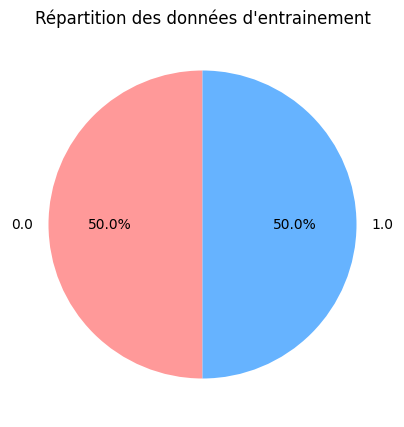

In [ ]:
plt.figure(figsize=(5, 5))
y_train.value_counts().plot.pie(
    autopct='%1.1f%%',  # Affiche le pourcentage avec une décimale
    startangle=90,      # Démarre le camembert à 90 degrés
    colors=['#ff9999','#66b3ff']  # Ajoutez des couleurs personnalisées si désiré
)
plt.title('Répartition des données d\'entrainement')
plt.ylabel('')  # Masquer l'étiquette de l'axe y
plt.show()

#Application des algorithmes

##Regression Logistique

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lgr = LogisticRegression(random_state=0)
lgr.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pre_test = lgr.predict(X_test)

y_pre_test_syn = lgr.predict(test_X)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# Prédictions des probabilités pour les classes positives
y_scores = lgr.predict(X_test)

# Calcul des métriques pour la courbe ROC
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_scores)
roc_auc = metrics.auc(fpr, tpr)
print(f"AUC-ROC: {roc_auc:.2f}")

AUC-ROC: 1.00


In [ ]:
test_accurry = accuracy_score(y_pre_test, y_test)
print('Accuracy the test dataset for logistic reg : ', test_accurry)

test_accurry_syn = accuracy_score(y_pre_test_syn, test_y)
print('Accuracy on the synthetic data for logistic reg : ', test_accurry_syn)

Accuracy the test dataset for logistic reg :  1.0
Accuracy on the synthetic data for logistic reg :  1.0


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
print(classification_report(y_test, y_pre_test ))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5887
         1.0       1.00      1.00      1.00       411

    accuracy                           1.00      6298
   macro avg       1.00      1.00      1.00      6298
weighted avg       1.00      1.00      1.00      6298



In [ ]:
print(classification_report(test_y, y_pre_test_syn ))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     23537
         1.0       1.00      1.00      1.00      1655

    accuracy                           1.00     25192
   macro avg       1.00      1.00      1.00     25192
weighted avg       1.00      1.00      1.00     25192



<Axes: >

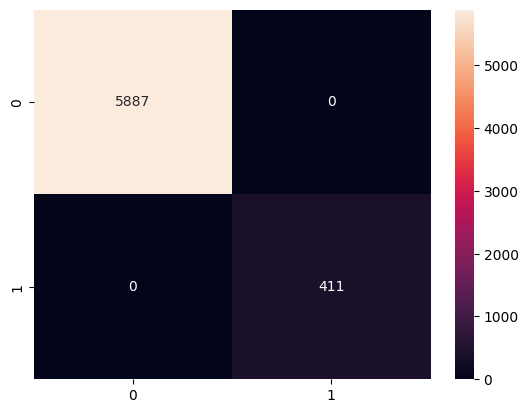

In [ ]:
confusion_matrix(y_test, y_pre_test )
sns.heatmap(confusion_matrix(y_test,y_pre_test), annot = True, fmt='0.0f')

<Axes: >

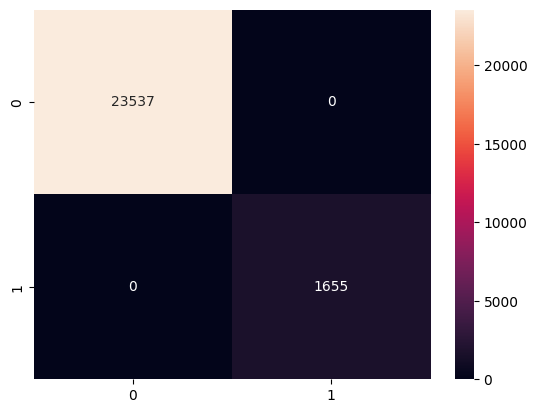

In [ ]:
confusion_matrix(y_test, y_pre_test )
sns.heatmap(confusion_matrix(test_y,y_pre_test_syn), annot = True, fmt='0.0f')

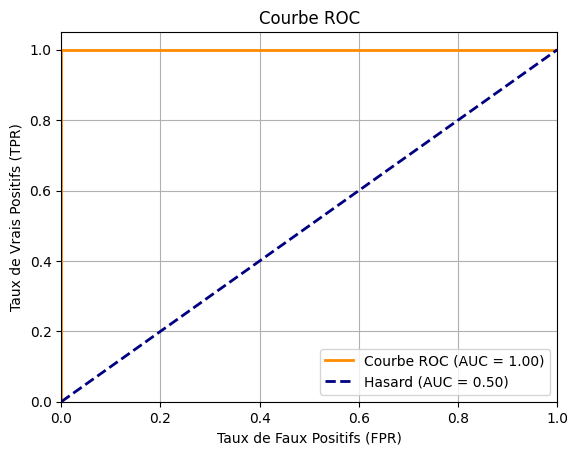

In [ ]:
# Tracé de la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Hasard (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.grid()
plt.show()

##Arbre de décision

In [ ]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
#Predict the response for synthetic data
y_pre_test_syn = clf.predict(test_X)

In [ ]:
clf.score(X_train, y_train)

1.0

In [ ]:
# Prédictions des probabilités pour les classes positives
y_scores = clf.predict(X_test)

# Calcul des métriques pour la courbe ROC
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_scores)
roc_auc = metrics.auc(fpr, tpr)
print(f"AUC-ROC: {roc_auc:.2f}")

AUC-ROC: 1.00


In [ ]:
test_accurry = accuracy_score(y_pre_test, y_test)
print('Accuracy the test dataset for logistic reg : ', test_accurry)

test_accurry_syn = accuracy_score(y_pre_test_syn, test_y)
print('Accuracy on the synthetic data for logistic reg : ', test_accurry_syn)

Accuracy the test dataset for logistic reg :  1.0
Accuracy on the synthetic data for logistic reg :  1.0


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5887
         1.0       1.00      1.00      1.00       411

    accuracy                           1.00      6298
   macro avg       1.00      1.00      1.00      6298
weighted avg       1.00      1.00      1.00      6298



In [ ]:
print(classification_report(test_y, y_pre_test_syn ))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     23537
         1.0       1.00      1.00      1.00      1655

    accuracy                           1.00     25192
   macro avg       1.00      1.00      1.00     25192
weighted avg       1.00      1.00      1.00     25192



<Axes: >

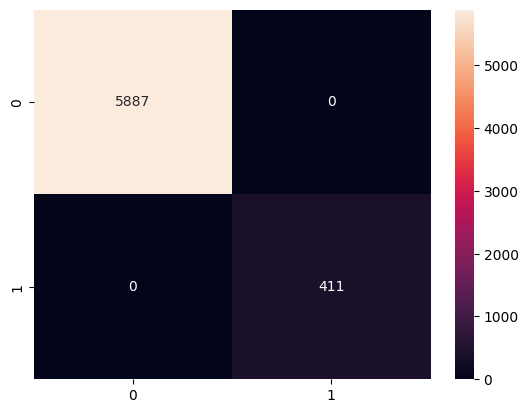

In [ ]:
# the confusion matrix for our model
confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt='0.0f')

<Axes: >

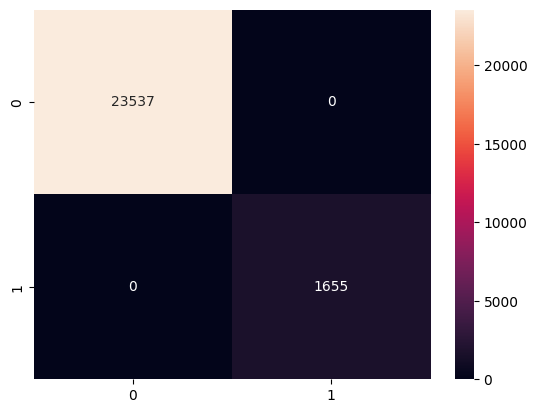

In [ ]:
confusion_matrix(y_test, y_pre_test )
sns.heatmap(confusion_matrix(test_y,y_pre_test_syn), annot = True, fmt='0.0f')

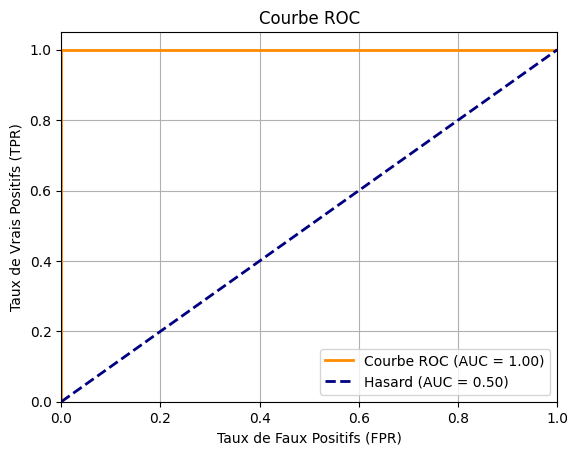

In [ ]:
# Tracé de la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Hasard (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.grid()
plt.show()

##Forets aléatoires

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10)
# fittin the model
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [ ]:
# prediction on validation dataset
y_pred = rfc.predict(X_test)
#Predict the response for synthetic data
y_pred_syn = rfc.predict(test_X)

In [ ]:
# prediction on training dataset
y_pred_train = rfc.predict(X_train)

In [ ]:
# Prédictions des probabilités pour les classes positives
y_scores = rfc.predict(X_test)

# Calcul des métriques pour la courbe ROC
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_scores)
roc_auc = metrics.auc(fpr, tpr)
print(f"AUC-ROC: {roc_auc:.2f}")

AUC-ROC: 1.00


In [ ]:
from sklearn import metrics

print("Train ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_train, y_pred_train))
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
print("ACCURACY OF THE MODEL ON THE SYNTHETIC DATA: ", metrics.accuracy_score(test_y, y_pred_syn))


Train ACCURACY OF THE MODEL:  1.0
ACCURACY OF THE MODEL:  0.9998412194347411
ACCURACY OF THE MODEL ON THE SYNTHETIC DATA:  0.9999603048586853


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5887
         1.0       1.00      1.00      1.00       411

    accuracy                           1.00      6298
   macro avg       1.00      1.00      1.00      6298
weighted avg       1.00      1.00      1.00      6298



In [ ]:
print(classification_report(test_y, y_pred_syn))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     23537
         1.0       1.00      1.00      1.00      1655

    accuracy                           1.00     25192
   macro avg       1.00      1.00      1.00     25192
weighted avg       1.00      1.00      1.00     25192



<Axes: >

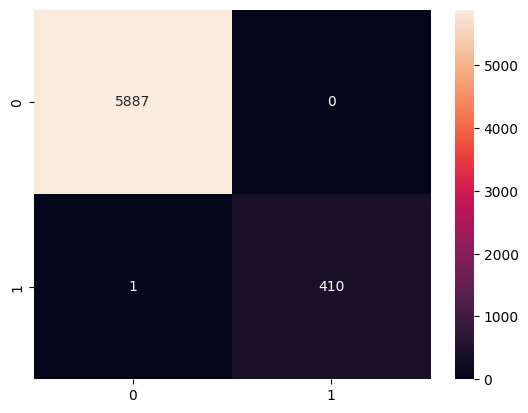

In [ ]:
confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt='0.0f')

<Axes: >

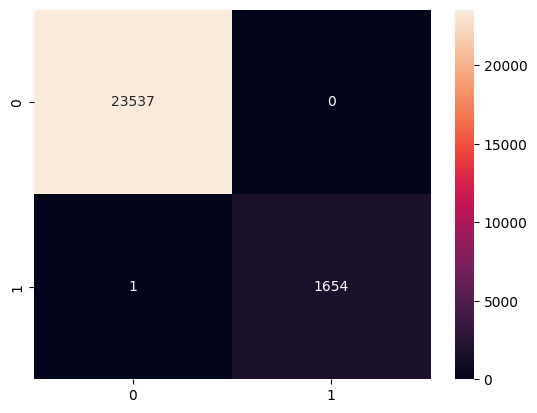

In [ ]:
confusion_matrix(test_y, y_pred_syn)
sns.heatmap(confusion_matrix(test_y, y_pred_syn), annot = True, fmt='0.0f')

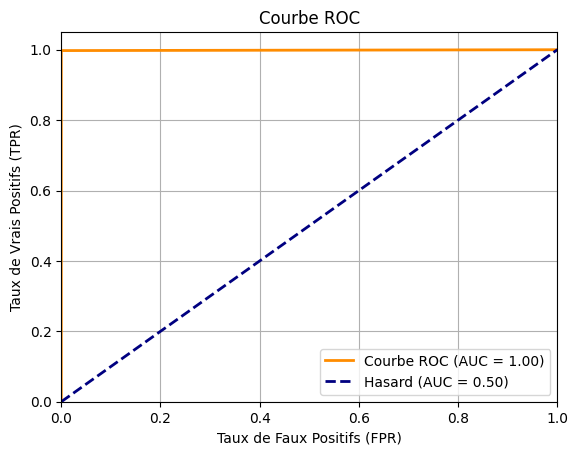

In [ ]:
# Tracé de la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Hasard (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.grid()
plt.show()

##Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB, BernoulliNB, ComplementNB

In [ ]:
# Bernoullis Navaive bayes classifier
nvb = GaussianNB()
nvb.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pre_test = nvb.predict(X_test)
y_pre_test_syn = nvb.predict(test_X)
y_pre_train = nvb.predict(X_train)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# Prédictions des probabilités pour les classes positives
y_scores = nvb.predict(X_test)

# Calcul des métriques pour la courbe ROC
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_scores)
roc_auc = metrics.auc(fpr, tpr)
print(f"AUC-ROC: {roc_auc:.2f}")

AUC-ROC: 0.99


In [ ]:
train_accurry = accuracy_score(y_pre_train, y_train)
test_accurry = accuracy_score(y_pre_test, y_test)
test_accurry_syn = accuracy_score(y_pre_test_syn, test_y)
print('Accuracy for train dataset for naive bayes reg : ', train_accurry)
print('Accuracy for test dataset for naive bayes reg : ', test_accurry)
print('Accuracy on the synthetic dataset for naive bayes reg : ', test_accurry_syn)

Accuracy for train dataset for naive bayes reg :  0.9980736543909349
Accuracy for test dataset for naive bayes reg :  0.9985709749126707
Accuracy on the synthetic dataset for naive bayes reg :  0.9993648777389648


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pre_test ))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5887
         1.0       1.00      0.98      0.99       411

    accuracy                           1.00      6298
   macro avg       1.00      0.99      0.99      6298
weighted avg       1.00      1.00      1.00      6298



In [ ]:
print(classification_report(test_y, y_pre_test_syn ))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     23537
         1.0       1.00      0.99      1.00      1655

    accuracy                           1.00     25192
   macro avg       1.00      1.00      1.00     25192
weighted avg       1.00      1.00      1.00     25192



<Axes: >

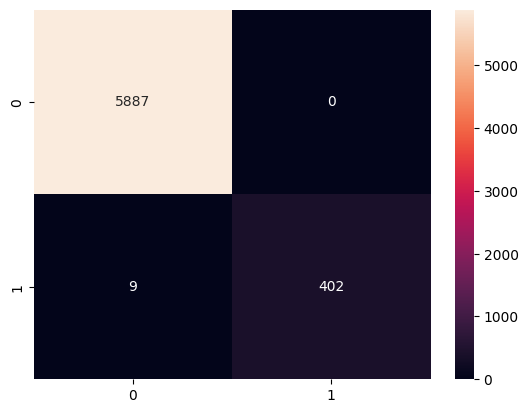

In [ ]:
confusion_matrix(y_test, y_pre_test)
sns.heatmap(confusion_matrix(y_test, y_pre_test), annot = True, fmt='0.0f')

<Axes: >

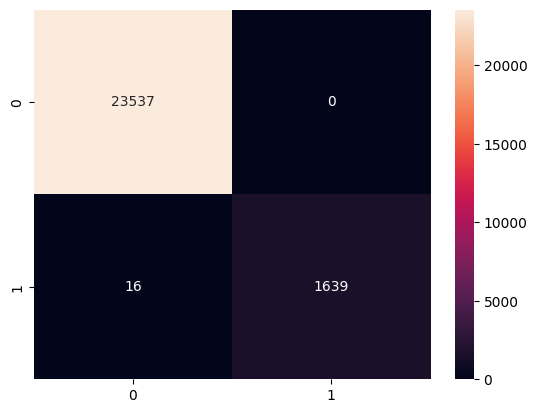

In [ ]:
confusion_matrix(test_y, y_pre_test_syn)
sns.heatmap(confusion_matrix(test_y, y_pre_test_syn), annot = True, fmt='0.0f')

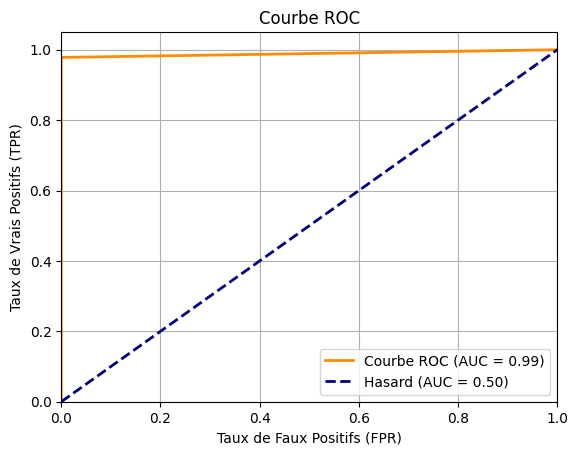

In [ ]:
# Tracé de la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Hasard (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.grid()
plt.show()

#COMPARAISON DES DIFFERENTS MODELES

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold

In [ ]:
def training(estimator,x, y,cv=None,n_jobs=1, train_sizes=np.linspace(0.01, 1.0, 5)):
    train_sizes, train_scores, test_scores,fit_times,_ = learning_curve(estimator, x, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='roc_auc_ovr',shuffle=True,verbose=1,return_times=True)
    return train_sizes, train_scores, test_scores,fit_times

In [ ]:
def training_svm(estimator,x, y,cv=None,n_jobs=1, train_sizes=np.linspace(0.01, 1.0, 5)):
    train_sizes, train_scores, test_scores,fit_times,_ = learning_curve(estimator, x, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='roc_auc',shuffle=True,verbose=1,return_times=True)
    return train_sizes, train_scores, test_scores,fit_times

In [ ]:
def plot_training(train_sizes,train_scores_mean,train_scores_std,test_scores_mean,test_scores_std,fit_times_mean,fit_times_std,title,ylim=None):
    _, axes = plt.subplots(1, 3, figsize=(20, 5))
    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1,color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    path= title
    plt.savefig(path)

    plt.show()

##Logistic Regression

In [ ]:
title = "Learning Curves (Logistic Regression)"
cv =KFold(10,shuffle=True,random_state=35)
estimator = OneVsRestClassifier(LogisticRegression())
train_sizes,train_scores, test_scores,fit_times= training(estimator, X, y, cv=cv, n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 5))

[learning_curve] Training set sizes: [  226  5838 11449 17060 22672]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.5s finished


In [ ]:
train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)

test_scores_mean = test_scores.mean(axis=1)
test_scores_std = test_scores.std(axis=1)

fit_times_mean = fit_times.mean(axis=1)
fit_times_std = fit_times.std(axis=1)

In [ ]:
train_scores_mean+train_scores_std

array([1.00009088, 1.        , 1.        , 1.        , 1.        ])

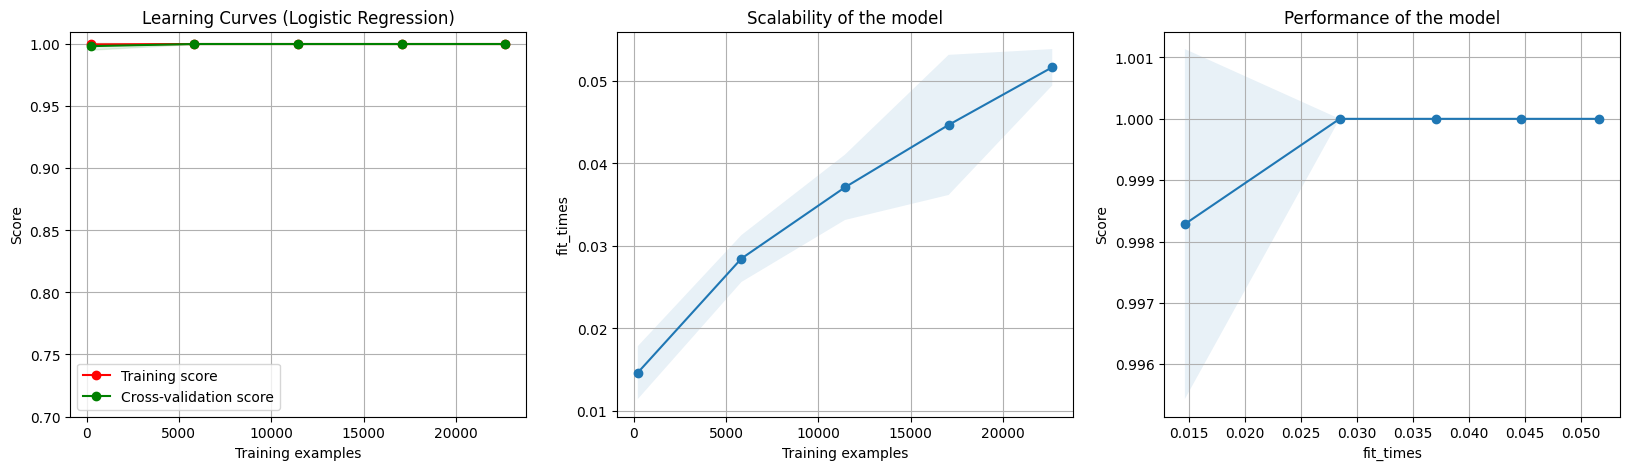

In [ ]:
plot_training(train_sizes,train_scores_mean,train_scores_std,test_scores_mean,test_scores_std,fit_times_mean,fit_times_std,title,ylim=(0.7, 1.01))

##Arbre de decision

In [ ]:
title = "Learning Curves(Decision Tree)"
cv =KFold(10,shuffle=True,random_state=35)
estimator = OneVsRestClassifier(DecisionTreeClassifier())
train_sizes,train_scores, test_scores,fit_times= training(estimator, X, y, cv=cv, n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 5))

[learning_curve] Training set sizes: [  226  5838 11449 17060 22672]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.3s finished


In [ ]:
train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)

test_scores_mean = test_scores.mean(axis=1)
test_scores_std = test_scores.std(axis=1)

fit_times_mean = fit_times.mean(axis=1)
fit_times_std = fit_times.std(axis=1)

In [ ]:
train_scores_mean+train_scores_std

array([1., 1., 1., 1., 1.])

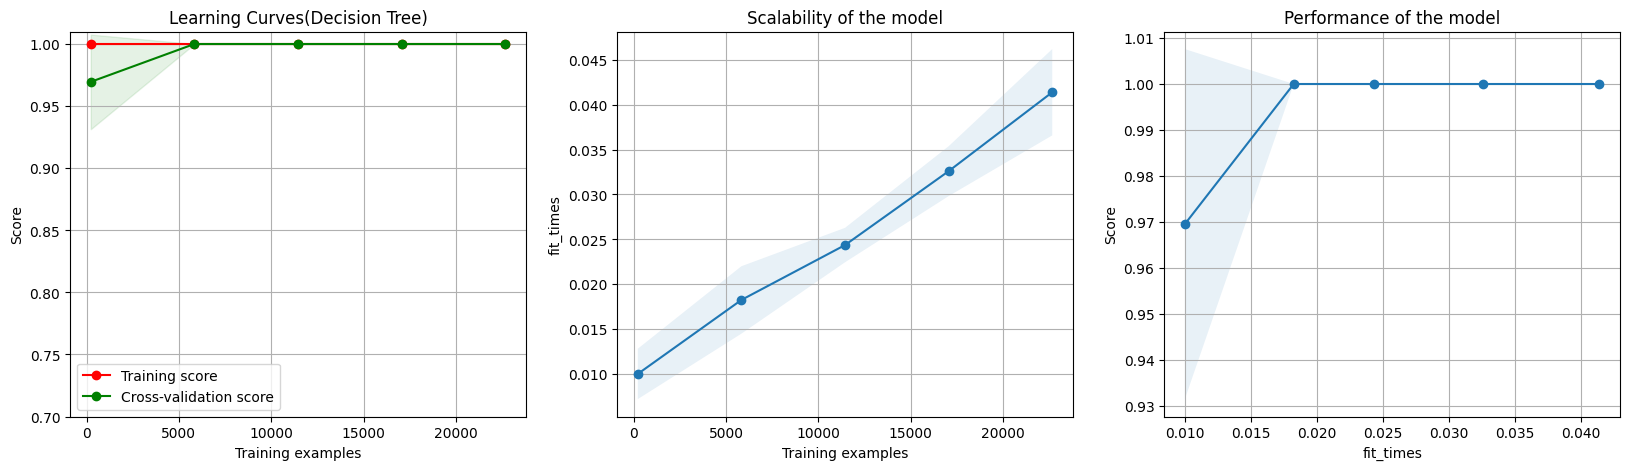

In [ ]:
plot_training(train_sizes,train_scores_mean,train_scores_std,test_scores_mean,test_scores_std,fit_times_mean,fit_times_std,title,ylim=(0.7, 1.01))

##Foret Aléatoire

In [ ]:
title = "Learning Curves(RandomForest)"
cv =KFold(10,shuffle=True,random_state=35)
estimator = OneVsRestClassifier(RandomForestClassifier(n_estimators=10))
train_sizes,train_scores, test_scores,fit_times= training(estimator, X, y, cv=cv, n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 5))

[learning_curve] Training set sizes: [  226  5838 11449 17060 22672]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.7s finished


In [ ]:
train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)

test_scores_mean = test_scores.mean(axis=1)
test_scores_std = test_scores.std(axis=1)

fit_times_mean = fit_times.mean(axis=1)
fit_times_std = fit_times.std(axis=1)

In [ ]:
train_scores_mean+train_scores_std

array([1., 1., 1., 1., 1.])

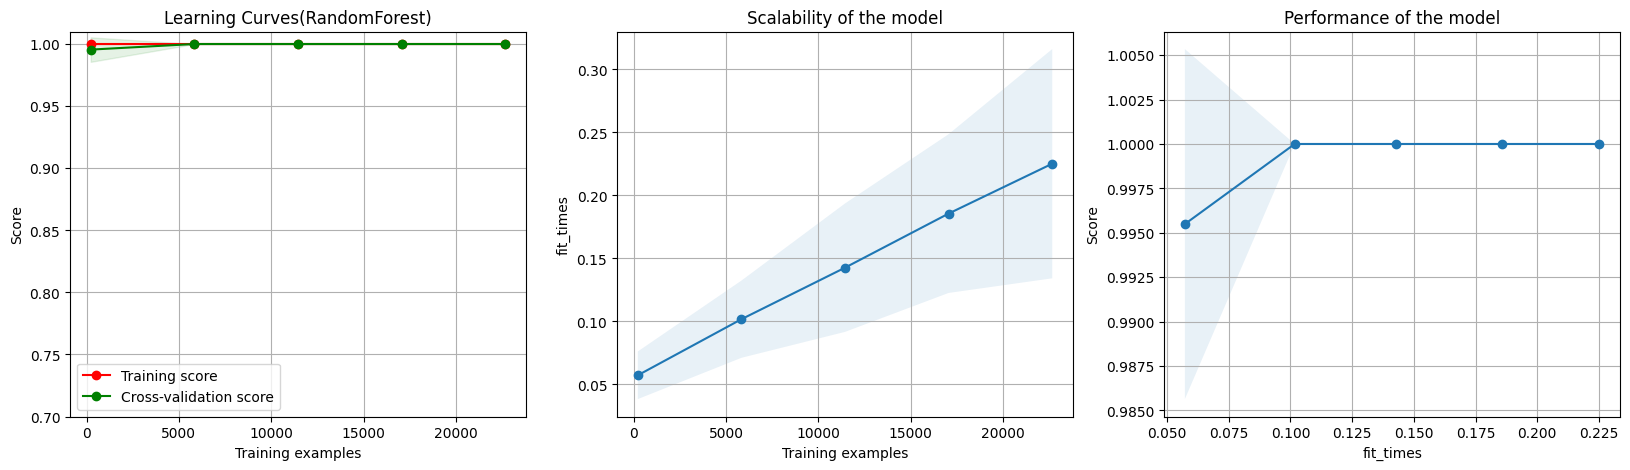

In [ ]:
plot_training(train_sizes,train_scores_mean,train_scores_std,test_scores_mean,test_scores_std,fit_times_mean,fit_times_std,title,ylim=(0.7, 1.01))

##Gaussian Naive Bayes

In [ ]:
title = "Learning Curves (Gaussian Naive Bayes)"
cv =KFold(5,shuffle=True,random_state=35)
estimator = OneVsRestClassifier(GaussianNB())
train_sizes, train_scores, test_scores,fit_times= training(estimator, X, y, cv=cv, n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 5))

[learning_curve] Training set sizes: [  201  5189 10177 15165 20153]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.6s finished


In [ ]:
train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)

test_scores_mean = test_scores.mean(axis=1)
test_scores_std= test_scores.std(axis=1)

fit_times_mean = fit_times.mean(axis=1)
fit_times_std = fit_times.std(axis=1)

In [ ]:
train_scores_mean+train_scores_std

array([1., 1., 1., 1., 1.])

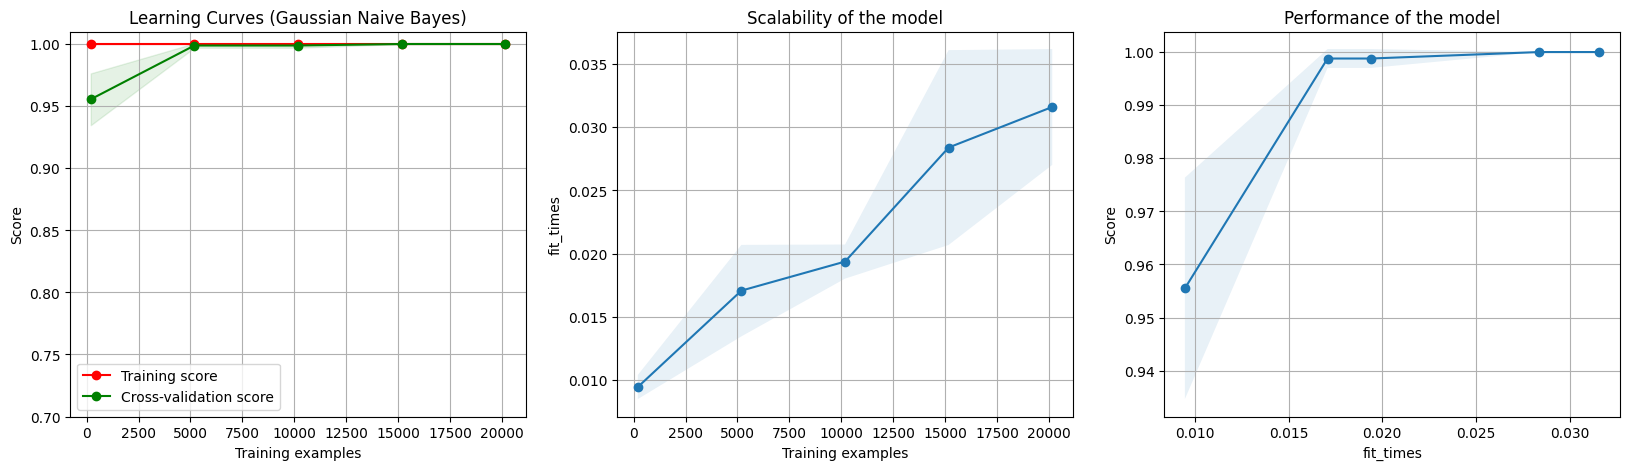

In [ ]:
plot_training(train_sizes,train_scores_mean,train_scores_std,test_scores_mean,test_scores_std,fit_times_mean,fit_times_std,title,ylim=(0.7, 1.01))